# Streamlined analysis notebook from PCR_filepath_generate.ipynb

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob

In [4]:
pcrdata = pd.read_csv('PCR_results.txt', sep='\t')
pcrdata['kraken_outputs'] = '/global/scratch/projects/fc_wolflab/bbioinfo/sarrah/batches/trimmed_all/Plate'+pcrdata['Plate'].astype(str) + '/' + pcrdata['Well'] + '/kraken_reports/*.k2report'
pcrdata.tail()

,Plate,Well,Confirmed,kraken_outputs
34,2,E6,0,/global/scratch/projects/fc_wolflab/bbioinfo/s...
35,2,H10,0,/global/scratch/projects/fc_wolflab/bbioinfo/s...
36,2,H8,0,/global/scratch/projects/fc_wolflab/bbioinfo/s...
37,2,A12,0,/global/scratch/projects/fc_wolflab/bbioinfo/s...
38,2,B2,0,/global/scratch/projects/fc_wolflab/bbioinfo/s...


In [5]:
testdf = pcrdata['Well'].value_counts().to_frame().reset_index()
# testdf.sum(numeric_only=True)['Well']
testdf

,Well,count
0,F6,2
1,F5,2
2,H10,2
3,A12,2
4,G2,2
5,A2,1
6,A5,1
7,E1,1
8,A9,1
9,A10,1


In [6]:
# get filepaths from /global/scratch/projects/fc_wolflab/bbioinfo/sarrah/batches/Corrected_Final_Config.csv
configfile_df = pd.read_csv('/global/scratch/projects/fc_wolflab/bbioinfo/sarrah/batches/Corrected_Final_Config.csv', usecols=[ 'R1_Filepath', 'Plate', 'Libary Name'])
configfile_df['Plate_number'] = configfile_df['Plate'].str[-1]
configfile_df['Plate_number'] = pd.to_numeric(configfile_df['Plate_number'])
configfile_df['kraken_outputs'] = '/global/scratch/projects/fc_wolflab/bbioinfo/sarrah/batches/trimmed_all/Plate'+configfile_df['Plate_number'].astype(str) + '/' + configfile_df['Libary Name'] + '/kraken_reports/*.k2report'
configfile_df.tail()

,R1_Filepath,Plate,Libary Name,Plate_number,kraken_outputs
187,/global/scratch/projects/fc_wolflab/bbioinfo/2...,Plate2,H5,2,/global/scratch/projects/fc_wolflab/bbioinfo/s...
188,/global/scratch/projects/fc_wolflab/bbioinfo/2...,Plate2,H6,2,/global/scratch/projects/fc_wolflab/bbioinfo/s...
189,/global/scratch/projects/fc_wolflab/bbioinfo/2...,Plate2,H7,2,/global/scratch/projects/fc_wolflab/bbioinfo/s...
190,/global/scratch/projects/fc_wolflab/bbioinfo/2...,Plate2,H8,2,/global/scratch/projects/fc_wolflab/bbioinfo/s...
191,/global/scratch/projects/fc_wolflab/bbioinfo/2...,Plate2,H9,2,/global/scratch/projects/fc_wolflab/bbioinfo/s...


In [7]:
def kraken_genome_est(fpath, df=False):
    glob_search = glob.glob(fpath)  #get file name
    
    if glob_search: # Check if a file was found
        python_fpath = glob_search[0] # Get the first (and only) file path

        datalist = [] # initiate list for df
        
        # Open and process the file
        with open(python_fpath, 'r') as f:
            for line in f:
                data = line.split('\t')
                data = [x.strip() for x in data]
                datalist.append(data)

        columns = ['pct', 'clade_reads', 'taxon_reads', 'rank', 'ID', 'name']
        # Convert the data list into a pandas DataFrame
        kraken_df = pd.DataFrame(datalist, columns=columns)
        # convert percents/counts to float/int
        kraken_df['pct'] = pd.to_numeric(kraken_df['pct'], errors='raise')
        kraken_df['clade_reads'] = pd.to_numeric(kraken_df['clade_reads'], errors='raise')
        kraken_df['taxon_reads'] = pd.to_numeric(kraken_df['taxon_reads'], errors='raise')
        
        # Estimate number of genomes in the sample

        # Step 1: is there Eukaryotic DNA present
        domain = kraken_df[(kraken_df['rank']=='D') & (kraken_df['pct']>3)]['name'].to_list()
        #if eukaryota in list then ... throw away?
        if "Eukaryota" in domain:
            euk_contam = kraken_df[kraken_df['name']=='Eukaryota']['pct'].iloc[0]
        else:
            euk_contam = 0

        # Step 2: How many different species are represented
        species = kraken_df[(kraken_df['rank']=='S') & (kraken_df['pct']>10)]['name'].to_list()
            


        if df:
            # print(contam_score)
            return kraken_df
        else:
            return domain, euk_contam, species

    else:
        print("No files found matching the file pattern.")


In [8]:
# merge pcr data with kraken , no bvbrc data # 'Domains_detect', 'Euk_reads', 'Species_detected'
pcrdata[['Domains_detect', 'Euk_reads', 'Species_detected']] = pcrdata['kraken_outputs'].apply(lambda x: pd.Series(kraken_genome_est(x)))
pcrdata

No files found matching the file pattern.


,Plate,Well,Confirmed,kraken_outputs,Domains_detect,Euk_reads,Species_detected
0,1,A2,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"[Bacteria, Eukaryota]",6.22,[Phocaeicola vulgatus]
1,1,A5,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"[Bacteria, Eukaryota]",6.57,[Phocaeicola vulgatus]
2,1,A9,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"[Bacteria, Eukaryota]",9.29,[Phocaeicola vulgatus]
3,1,A10,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"[Bacteria, Eukaryota]",8.75,[Phocaeicola dorei]
4,1,B5,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"[Bacteria, Eukaryota]",8.34,[Phocaeicola vulgatus]
5,1,E1,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...,[Bacteria],0.00,[Phocaeicola vulgatus]
6,1,E2,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"[Bacteria, Eukaryota]",5.86,[Phocaeicola vulgatus]
7,1,F1,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"[Bacteria, Eukaryota]",3.10,[Phocaeicola vulgatus]
8,1,F5,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"[Bacteria, Eukaryota]",8.59,[Phocaeicola dorei]
9,1,F6,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"[Bacteria, Eukaryota]",5.72,[Parabacteroides distasonis]


In [9]:
pcrdata['Species_count'] = pcrdata['Species_detected'].str.len().fillna(0.0).astype(int)
pcrdata

,Plate,Well,Confirmed,kraken_outputs,Domains_detect,Euk_reads,Species_detected,Species_count
0,1,A2,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"[Bacteria, Eukaryota]",6.22,[Phocaeicola vulgatus],1
1,1,A5,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"[Bacteria, Eukaryota]",6.57,[Phocaeicola vulgatus],1
2,1,A9,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"[Bacteria, Eukaryota]",9.29,[Phocaeicola vulgatus],1
3,1,A10,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"[Bacteria, Eukaryota]",8.75,[Phocaeicola dorei],1
4,1,B5,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"[Bacteria, Eukaryota]",8.34,[Phocaeicola vulgatus],1
5,1,E1,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...,[Bacteria],0.00,[Phocaeicola vulgatus],1
6,1,E2,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"[Bacteria, Eukaryota]",5.86,[Phocaeicola vulgatus],1
7,1,F1,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"[Bacteria, Eukaryota]",3.10,[Phocaeicola vulgatus],1
8,1,F5,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"[Bacteria, Eukaryota]",8.59,[Phocaeicola dorei],1
9,1,F6,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"[Bacteria, Eukaryota]",5.72,[Parabacteroides distasonis],1


/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to 

Text(0.5, 1.0, "PCR'd List: Histogram of reads mapped to Eukaryota")

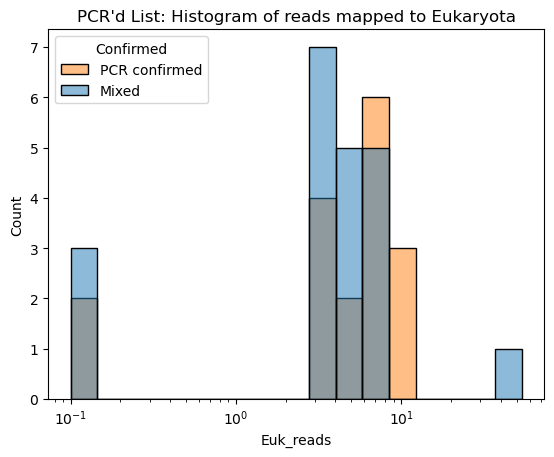

In [10]:
pcrdata['Euk_reads'] += 0.1
sns.histplot(pcrdata, x='Euk_reads', hue='Confirmed', log_scale=True, legend=False)
plt.legend(title='Confirmed', loc='upper left', labels=['PCR confirmed','Mixed'])

plt.title("PCR'd List: Histogram of reads mapped to Eukaryota")

/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to 

Text(0.5, 1.0, "PCR'd List: # Species Assignments")

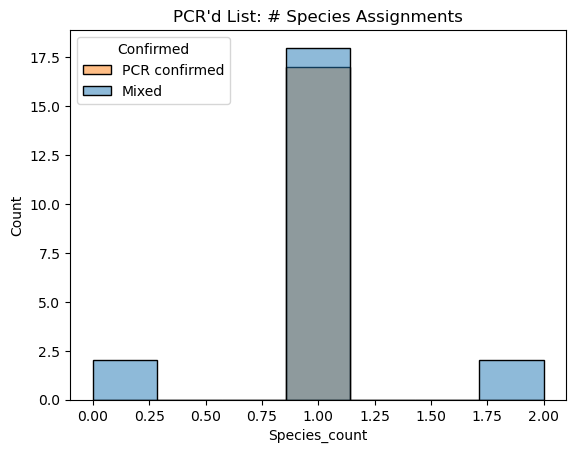

In [11]:
# from  matplotlib.ticker import FuncFormatter
# plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))

sns.histplot(pcrdata, x='Species_count', hue='Confirmed', legend=False)
plt.legend(title='Confirmed', loc='upper left', labels=['PCR confirmed','Mixed'])
plt.title("PCR'd List: # Species Assignments")

In [12]:
kraken_genome_est(pcrdata.iloc[24,3], True).head()

,pct,clade_reads,taxon_reads,rank,ID,name
0,1.29,65492,65492,U,0,unclassified
1,98.71,5020049,47,R,1,root
2,98.71,5019929,7616,R1,131567,cellular organisms
3,94.64,4812791,73231,D,2,Bacteria
4,91.08,4631975,0,D1,1783270,FCB group


In [13]:
configfile_df[['Domains_detect', 'Euk_reads', 'Species_detected']] = configfile_df['kraken_outputs'].apply(lambda x: pd.Series(kraken_genome_est(x)))
configfile_df.head()

No files found matching the file pattern.
No files found matching the file pattern.
No files found matching the file pattern.
No files found matching the file pattern.
No files found matching the file pattern.
No files found matching the file pattern.
No files found matching the file pattern.
No files found matching the file pattern.
No files found matching the file pattern.
No files found matching the file pattern.
No files found matching the file pattern.


,R1_Filepath,Plate,Libary Name,Plate_number,kraken_outputs,Domains_detect,Euk_reads,Species_detected
0,/global/scratch/projects/fc_wolflab/bbioinfo/2...,Plate1,A1,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"[Bacteria, Eukaryota]",4.10,[Bacteroides cellulosilyticus]
1,/global/scratch/projects/fc_wolflab/bbioinfo/2...,Plate1,A2,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"[Bacteria, Eukaryota]",6.22,[Phocaeicola vulgatus]
2,/global/scratch/projects/fc_wolflab/bbioinfo/2...,Plate1,A3,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"[Bacteria, Eukaryota]",10.65,"[Bacteroides ovatus, Homo sapiens]"
3,/global/scratch/projects/fc_wolflab/bbioinfo/2...,Plate1,A4,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"[Bacteria, Eukaryota]",5.73,[Bacteroides faecis]
4,/global/scratch/projects/fc_wolflab/bbioinfo/2...,Plate1,A5,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"[Bacteria, Eukaryota]",6.57,[Phocaeicola vulgatus]


/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'All: Histogram of reads mapped to Eukaryota')

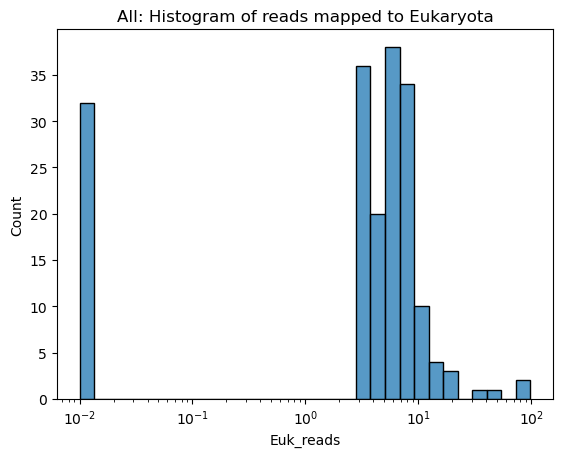

In [14]:
configfile_df['Euk_reads'] += 0.01
sns.histplot(configfile_df, x='Euk_reads',log_scale=True)
plt.title('All: Histogram of reads mapped to Eukaryota')

In [15]:
configfile_df = configfile_df.dropna() # I checked -- all NaNs are the blank genomes on the bacteroides strainsID sheet
configfile_df['Species_count'] = configfile_df['Species_detected'].str.len().astype(int)
configfile_df

,R1_Filepath,Plate,Libary Name,Plate_number,kraken_outputs,Domains_detect,Euk_reads,Species_detected,Species_count
0,/global/scratch/projects/fc_wolflab/bbioinfo/2...,Plate1,A1,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"[Bacteria, Eukaryota]",4.11,[Bacteroides cellulosilyticus],1
1,/global/scratch/projects/fc_wolflab/bbioinfo/2...,Plate1,A2,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"[Bacteria, Eukaryota]",6.23,[Phocaeicola vulgatus],1
2,/global/scratch/projects/fc_wolflab/bbioinfo/2...,Plate1,A3,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"[Bacteria, Eukaryota]",10.66,"[Bacteroides ovatus, Homo sapiens]",2
3,/global/scratch/projects/fc_wolflab/bbioinfo/2...,Plate1,A4,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"[Bacteria, Eukaryota]",5.74,[Bacteroides faecis],1
4,/global/scratch/projects/fc_wolflab/bbioinfo/2...,Plate1,A5,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"[Bacteria, Eukaryota]",6.58,[Phocaeicola vulgatus],1
...,...,...,...,...,...,...,...,...,...
187,/global/scratch/projects/fc_wolflab/bbioinfo/2...,Plate2,H5,2,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"[Bacteria, Eukaryota]",3.20,[Bacteroides ovatus],1
188,/global/scratch/projects/fc_wolflab/bbioinfo/2...,Plate2,H6,2,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"[Bacteria, Eukaryota]",3.31,[Bacteroides ovatus],1
189,/global/scratch/projects/fc_wolflab/bbioinfo/2...,Plate2,H7,2,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"[Bacteria, Eukaryota]",4.47,[Bacteroides ovatus],1
190,/global/scratch/projects/fc_wolflab/bbioinfo/2...,Plate2,H8,2,/global/scratch/projects/fc_wolflab/bbioinfo/s...,[Bacteria],0.01,[Bacteroides faecis],1


In [14]:
configfile_df['Species_count'].value_counts().to_frame().reset_index()

,Species_count,count
0,1,158
1,2,19
2,3,2
3,0,2


Text(0.5, 1.0, 'All: # Species Assignments')

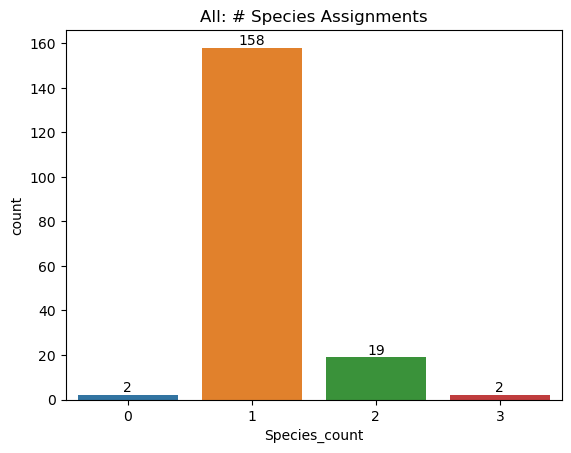

In [15]:
# from  matplotlib.ticker import FuncFormatter
# plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))

# sns.histplot(configfile_df, x='Species_count',)
ax = sns.barplot(configfile_df['Species_count'].value_counts().to_frame().reset_index(), x='Species_count', y='count')
ax.bar_label(ax.containers[0], fontsize=10);
plt.title('All: # Species Assignments')

In [16]:
configfile_df[configfile_df.isna().any(axis=1)]

,R1_Filepath,Plate,Libary Name,Plate_number,kraken_outputs,Domains_detect,Euk_reads,Species_detected,Species_count


In [17]:
# Function to pad the numbers in the 'Well' column
def pad_well(well):
    letter = well[0]
    number = well[1:]
    return f"{letter}{int(number):02d}"

In [18]:
single_genome = configfile_df.copy(deep=True)
single_genome = single_genome[single_genome['Species_count']==1]
single_genome['LibraryName'] = single_genome['Libary Name'].apply(pad_well)
single_genome

,R1_Filepath,Plate,Libary Name,Plate_number,kraken_outputs,Domains_detect,Euk_reads,Species_detected,Species_count,LibraryName
0,/global/scratch/projects/fc_wolflab/bbioinfo/2...,Plate1,A1,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"[Bacteria, Eukaryota]",4.11,[Bacteroides cellulosilyticus],1,A01
1,/global/scratch/projects/fc_wolflab/bbioinfo/2...,Plate1,A2,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"[Bacteria, Eukaryota]",6.23,[Phocaeicola vulgatus],1,A02
3,/global/scratch/projects/fc_wolflab/bbioinfo/2...,Plate1,A4,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"[Bacteria, Eukaryota]",5.74,[Bacteroides faecis],1,A04
4,/global/scratch/projects/fc_wolflab/bbioinfo/2...,Plate1,A5,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"[Bacteria, Eukaryota]",6.58,[Phocaeicola vulgatus],1,A05
5,/global/scratch/projects/fc_wolflab/bbioinfo/2...,Plate1,A6,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"[Bacteria, Eukaryota]",8.77,[Bacteroides ovatus],1,A06
...,...,...,...,...,...,...,...,...,...,...
187,/global/scratch/projects/fc_wolflab/bbioinfo/2...,Plate2,H5,2,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"[Bacteria, Eukaryota]",3.20,[Bacteroides ovatus],1,H05
188,/global/scratch/projects/fc_wolflab/bbioinfo/2...,Plate2,H6,2,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"[Bacteria, Eukaryota]",3.31,[Bacteroides ovatus],1,H06
189,/global/scratch/projects/fc_wolflab/bbioinfo/2...,Plate2,H7,2,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"[Bacteria, Eukaryota]",4.47,[Bacteroides ovatus],1,H07
190,/global/scratch/projects/fc_wolflab/bbioinfo/2...,Plate2,H8,2,/global/scratch/projects/fc_wolflab/bbioinfo/s...,[Bacteria],0.01,[Bacteroides faecis],1,H08


In [19]:
configfile_df[configfile_df['Species_count']==2].shape

(19, 9)

In [20]:
configfile_df[configfile_df['Species_count']==3]

,R1_Filepath,Plate,Libary Name,Plate_number,kraken_outputs,Domains_detect,Euk_reads,Species_detected,Species_count
23,/global/scratch/projects/fc_wolflab/bbioinfo/2...,Plate1,B12,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"[Bacteria, Eukaryota]",21.24,"[Phocaeicola vulgatus, Bacteroides fragilis, H...",3
46,/global/scratch/projects/fc_wolflab/bbioinfo/2...,Plate1,D11,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"[Bacteria, Eukaryota]",13.87,"[Bacteroides thetaiotaomicron, Bacteroides ova...",3


In [21]:
# Just checked : 158 good (having 1) , 19 having 2, 3 having 3 = 179 genomes which is what we expect
# plate1 info: FASTQ Path - Read 1 , Best Genome Match
plateinfo = pd.read_csv('/global/scratch/projects/fc_wolflab/bbioinfo/Bacteroides_StrainsID_Sheet1.csv', usecols=['MP_BIND_PLATE' , 'MP_BIND_POS', 'Best Genome Match'])
plateinfo

,MP_BIND_PLATE,MP_BIND_POS,Best Genome Match
0,2,B03,Bacteroides caccae strain ATCC 43185 chromosom...
1,2,D10,Bacteroides caccae strain ATCC 43185 chromosom...
2,1,A01,Bacteroides cellulosilyticus strain WH2 chromo...
3,1,C02,Bacteroides cellulosilyticus strain WH2 chromo...
4,1,A10,"Bacteroides dorei CL03T12C01 chromosome, compl..."
...,...,...,...
187,1,H06,NaN
188,1,H11,NaN
189,2,A12,NaN
190,2,C07,NaN


In [22]:
single_genome_matches = single_genome.merge(plateinfo, 
                                            left_on=['LibraryName', 'Plate_number'],
                                           right_on=['MP_BIND_POS','MP_BIND_PLATE'])
single_genome_matches

,R1_Filepath,Plate,Libary Name,Plate_number,kraken_outputs,Domains_detect,Euk_reads,Species_detected,Species_count,LibraryName,MP_BIND_PLATE,MP_BIND_POS,Best Genome Match
0,/global/scratch/projects/fc_wolflab/bbioinfo/2...,Plate1,A1,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"[Bacteria, Eukaryota]",4.11,[Bacteroides cellulosilyticus],1,A01,1,A01,Bacteroides cellulosilyticus strain WH2 chromo...
1,/global/scratch/projects/fc_wolflab/bbioinfo/2...,Plate1,A2,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"[Bacteria, Eukaryota]",6.23,[Phocaeicola vulgatus],1,A02,1,A02,"Bacteroides vulgatus ATCC 8482, complete sequence"
2,/global/scratch/projects/fc_wolflab/bbioinfo/2...,Plate1,A4,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"[Bacteria, Eukaryota]",5.74,[Bacteroides faecis],1,A04,1,A04,"Bacteroides thetaiotaomicron VPI-5482, complet..."
3,/global/scratch/projects/fc_wolflab/bbioinfo/2...,Plate1,A5,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"[Bacteria, Eukaryota]",6.58,[Phocaeicola vulgatus],1,A05,1,A05,"Bacteroides vulgatus ATCC 8482, complete sequence"
4,/global/scratch/projects/fc_wolflab/bbioinfo/2...,Plate1,A6,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"[Bacteria, Eukaryota]",8.77,[Bacteroides ovatus],1,A06,1,A06,Bacteroides ovatus strain ATCC 8483 chromosome...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,/global/scratch/projects/fc_wolflab/bbioinfo/2...,Plate2,H5,2,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"[Bacteria, Eukaryota]",3.20,[Bacteroides ovatus],1,H05,2,H05,"Bacteroides thetaiotaomicron VPI-5482, complet..."
154,/global/scratch/projects/fc_wolflab/bbioinfo/2...,Plate2,H6,2,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"[Bacteria, Eukaryota]",3.31,[Bacteroides ovatus],1,H06,2,H06,Bacteroides ovatus strain ATCC 8483 chromosome...
155,/global/scratch/projects/fc_wolflab/bbioinfo/2...,Plate2,H7,2,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"[Bacteria, Eukaryota]",4.47,[Bacteroides ovatus],1,H07,2,H07,"Bacteroides faecis MAJ27 contig041, whole geno..."
156,/global/scratch/projects/fc_wolflab/bbioinfo/2...,Plate2,H8,2,/global/scratch/projects/fc_wolflab/bbioinfo/s...,[Bacteria],0.01,[Bacteroides faecis],1,H08,2,H08,"Bacteroides faecis MAJ27 contig041, whole geno..."


In [23]:
new_col = []
for index, row in single_genome_matches.iterrows():
    detected = row['Species_detected'][0].split(' ')[1]
    predicted = row['Best Genome Match'].split(' ')[1]
    if detected == predicted:
        # print('yay')
        new_col.append('Agree')
    elif detected != predicted:
        new_col.append('Disagree')
    else:
        new_col.append(None)
    # break
new_col

['Agree',
 'Agree',
 'Disagree',
 'Agree',
 'Agree',
 'Agree',
 'Agree',
 'Agree',
 'Agree',
 'Disagree',
 'Agree',
 'Agree',
 'Agree',
 'Agree',
 'Agree',
 'Agree',
 'Agree',
 'Agree',
 'Disagree',
 'Agree',
 'Disagree',
 'Agree',
 'Agree',
 'Disagree',
 'Disagree',
 'Agree',
 'Agree',
 'Agree',
 'Agree',
 'Agree',
 'Agree',
 'Agree',
 'Disagree',
 'Disagree',
 'Agree',
 'Disagree',
 'Agree',
 'Agree',
 'Agree',
 'Agree',
 'Agree',
 'Disagree',
 'Agree',
 'Agree',
 'Agree',
 'Agree',
 'Agree',
 'Agree',
 'Agree',
 'Disagree',
 'Agree',
 'Agree',
 'Agree',
 'Agree',
 'Disagree',
 'Agree',
 'Agree',
 'Agree',
 'Disagree',
 'Agree',
 'Agree',
 'Disagree',
 'Agree',
 'Agree',
 'Agree',
 'Agree',
 'Agree',
 'Agree',
 'Agree',
 'Agree',
 'Agree',
 'Agree',
 'Agree',
 'Agree',
 'Agree',
 'Agree',
 'Agree',
 'Agree',
 'Agree',
 'Agree',
 'Disagree',
 'Agree',
 'Agree',
 'Agree',
 'Agree',
 'Disagree',
 'Agree',
 'Agree',
 'Agree',
 'Agree',
 'Agree',
 'Agree',
 'Agree',
 'Agree',
 'Agree',
 '

In [24]:
single_genome_matches['PredictedvsDetected'] = new_col
single_genome_matches

,R1_Filepath,Plate,Libary Name,Plate_number,kraken_outputs,Domains_detect,Euk_reads,Species_detected,Species_count,LibraryName,MP_BIND_PLATE,MP_BIND_POS,Best Genome Match,PredictedvsDetected
0,/global/scratch/projects/fc_wolflab/bbioinfo/2...,Plate1,A1,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"[Bacteria, Eukaryota]",4.11,[Bacteroides cellulosilyticus],1,A01,1,A01,Bacteroides cellulosilyticus strain WH2 chromo...,Agree
1,/global/scratch/projects/fc_wolflab/bbioinfo/2...,Plate1,A2,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"[Bacteria, Eukaryota]",6.23,[Phocaeicola vulgatus],1,A02,1,A02,"Bacteroides vulgatus ATCC 8482, complete sequence",Agree
2,/global/scratch/projects/fc_wolflab/bbioinfo/2...,Plate1,A4,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"[Bacteria, Eukaryota]",5.74,[Bacteroides faecis],1,A04,1,A04,"Bacteroides thetaiotaomicron VPI-5482, complet...",Disagree
3,/global/scratch/projects/fc_wolflab/bbioinfo/2...,Plate1,A5,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"[Bacteria, Eukaryota]",6.58,[Phocaeicola vulgatus],1,A05,1,A05,"Bacteroides vulgatus ATCC 8482, complete sequence",Agree
4,/global/scratch/projects/fc_wolflab/bbioinfo/2...,Plate1,A6,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"[Bacteria, Eukaryota]",8.77,[Bacteroides ovatus],1,A06,1,A06,Bacteroides ovatus strain ATCC 8483 chromosome...,Agree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,/global/scratch/projects/fc_wolflab/bbioinfo/2...,Plate2,H5,2,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"[Bacteria, Eukaryota]",3.20,[Bacteroides ovatus],1,H05,2,H05,"Bacteroides thetaiotaomicron VPI-5482, complet...",Disagree
154,/global/scratch/projects/fc_wolflab/bbioinfo/2...,Plate2,H6,2,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"[Bacteria, Eukaryota]",3.31,[Bacteroides ovatus],1,H06,2,H06,Bacteroides ovatus strain ATCC 8483 chromosome...,Agree
155,/global/scratch/projects/fc_wolflab/bbioinfo/2...,Plate2,H7,2,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"[Bacteria, Eukaryota]",4.47,[Bacteroides ovatus],1,H07,2,H07,"Bacteroides faecis MAJ27 contig041, whole geno...",Disagree
156,/global/scratch/projects/fc_wolflab/bbioinfo/2...,Plate2,H8,2,/global/scratch/projects/fc_wolflab/bbioinfo/s...,[Bacteria],0.01,[Bacteroides faecis],1,H08,2,H08,"Bacteroides faecis MAJ27 contig041, whole geno...",Agree


In [25]:
single_genome_matches['PredictedvsDetected'].value_counts().to_frame().reset_index()

,PredictedvsDetected,count
0,Agree,134
1,Disagree,24


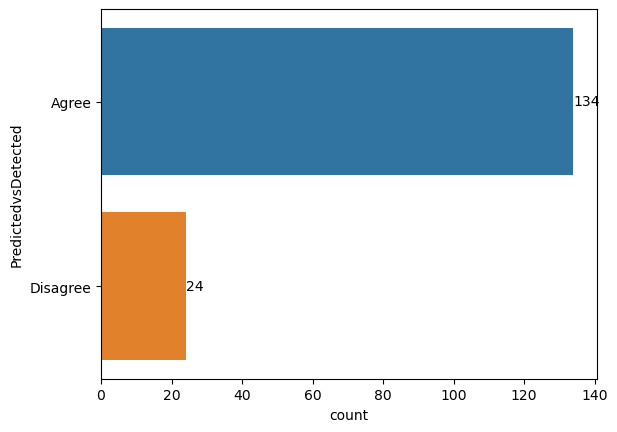

In [26]:
ax = sns.barplot(single_genome_matches['PredictedvsDetected'].value_counts().to_frame().reset_index(), x='count', y='PredictedvsDetected')
ax.bar_label(ax.containers[0], fontsize=10);


In [27]:
'/global/scratch/projects/fc_wolflab/bbioinfo/'.split('/')[1:-1]

['global', 'scratch', 'projects', 'fc_wolflab', 'bbioinfo']

In [28]:
'/'.join(single_genome_matches.iloc[0,4].split('/')[1:-2])

'global/scratch/projects/fc_wolflab/bbioinfo/sarrah/batches/trimmed_all/Plate1/A1'

In [29]:
# single_genome_matches['LibraryName'] = single_genome_matches['Libary Name']

In [30]:
single_genome_matches['Species_assigned_kraken'] = single_genome_matches['Species_detected'].str[0]
single_genome_matches['genome_path'] = '/global/scratch/projects/fc_wolflab/bbioinfo/sarrah/batches/final_genomes/Plate'+single_genome_matches['Plate_number'].astype(str) + '/' + single_genome_matches['Libary Name']

In [31]:
single_genome_matches.head()

,R1_Filepath,Plate,Libary Name,Plate_number,kraken_outputs,Domains_detect,Euk_reads,Species_detected,Species_count,LibraryName,MP_BIND_PLATE,MP_BIND_POS,Best Genome Match,PredictedvsDetected,Species_assigned_kraken,genome_path
0,/global/scratch/projects/fc_wolflab/bbioinfo/2...,Plate1,A1,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"[Bacteria, Eukaryota]",4.11,[Bacteroides cellulosilyticus],1,A01,1,A01,Bacteroides cellulosilyticus strain WH2 chromo...,Agree,Bacteroides cellulosilyticus,/global/scratch/projects/fc_wolflab/bbioinfo/s...
1,/global/scratch/projects/fc_wolflab/bbioinfo/2...,Plate1,A2,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"[Bacteria, Eukaryota]",6.23,[Phocaeicola vulgatus],1,A02,1,A02,"Bacteroides vulgatus ATCC 8482, complete sequence",Agree,Phocaeicola vulgatus,/global/scratch/projects/fc_wolflab/bbioinfo/s...
2,/global/scratch/projects/fc_wolflab/bbioinfo/2...,Plate1,A4,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"[Bacteria, Eukaryota]",5.74,[Bacteroides faecis],1,A04,1,A04,"Bacteroides thetaiotaomicron VPI-5482, complet...",Disagree,Bacteroides faecis,/global/scratch/projects/fc_wolflab/bbioinfo/s...
3,/global/scratch/projects/fc_wolflab/bbioinfo/2...,Plate1,A5,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"[Bacteria, Eukaryota]",6.58,[Phocaeicola vulgatus],1,A05,1,A05,"Bacteroides vulgatus ATCC 8482, complete sequence",Agree,Phocaeicola vulgatus,/global/scratch/projects/fc_wolflab/bbioinfo/s...
4,/global/scratch/projects/fc_wolflab/bbioinfo/2...,Plate1,A6,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"[Bacteria, Eukaryota]",8.77,[Bacteroides ovatus],1,A06,1,A06,Bacteroides ovatus strain ATCC 8483 chromosome...,Agree,Bacteroides ovatus,/global/scratch/projects/fc_wolflab/bbioinfo/s...


In [32]:
keep = single_genome_matches.copy(deep=True)
keep = keep[['Plate_number', 'LibraryName', 'genome_path', 'Species_assigned_kraken', 'Best Genome Match','PredictedvsDetected']]
keep

,Plate_number,LibraryName,genome_path,Species_assigned_kraken,Best Genome Match,PredictedvsDetected
0,1,A01,/global/scratch/projects/fc_wolflab/bbioinfo/s...,Bacteroides cellulosilyticus,Bacteroides cellulosilyticus strain WH2 chromo...,Agree
1,1,A02,/global/scratch/projects/fc_wolflab/bbioinfo/s...,Phocaeicola vulgatus,"Bacteroides vulgatus ATCC 8482, complete sequence",Agree
2,1,A04,/global/scratch/projects/fc_wolflab/bbioinfo/s...,Bacteroides faecis,"Bacteroides thetaiotaomicron VPI-5482, complet...",Disagree
3,1,A05,/global/scratch/projects/fc_wolflab/bbioinfo/s...,Phocaeicola vulgatus,"Bacteroides vulgatus ATCC 8482, complete sequence",Agree
4,1,A06,/global/scratch/projects/fc_wolflab/bbioinfo/s...,Bacteroides ovatus,Bacteroides ovatus strain ATCC 8483 chromosome...,Agree
...,...,...,...,...,...,...
153,2,H05,/global/scratch/projects/fc_wolflab/bbioinfo/s...,Bacteroides ovatus,"Bacteroides thetaiotaomicron VPI-5482, complet...",Disagree
154,2,H06,/global/scratch/projects/fc_wolflab/bbioinfo/s...,Bacteroides ovatus,Bacteroides ovatus strain ATCC 8483 chromosome...,Agree
155,2,H07,/global/scratch/projects/fc_wolflab/bbioinfo/s...,Bacteroides ovatus,"Bacteroides faecis MAJ27 contig041, whole geno...",Disagree
156,2,H08,/global/scratch/projects/fc_wolflab/bbioinfo/s...,Bacteroides faecis,"Bacteroides faecis MAJ27 contig041, whole geno...",Agree


In [33]:
keep.iloc[0,2]

'/global/scratch/projects/fc_wolflab/bbioinfo/sarrah/batches/final_genomes/Plate1/A1'

In [35]:
# keep.to_csv('genomes_singlekrakenassignment_humanfil.csv')

In [37]:
# keep[keep['Species_assigned_kraken']=='Bacteroides thetaiotaomicron'].to_csv('bthetas_humanfil.csv')

In [3]:
editthecsv = pd.read_csv('genomes_singlekrakenassignment_humanfil.csv', index_col=0)
editthecsv

,Plate_number,LibraryName,genome_path,Species_assigned_kraken,Best Genome Match,PredictedvsDetected
0,1,A01,/global/scratch/projects/fc_wolflab/bbioinfo/s...,Bacteroides cellulosilyticus,Bacteroides cellulosilyticus strain WH2 chromo...,Agree
1,1,A02,/global/scratch/projects/fc_wolflab/bbioinfo/s...,Phocaeicola vulgatus,"Bacteroides vulgatus ATCC 8482, complete sequence",Agree
2,1,A04,/global/scratch/projects/fc_wolflab/bbioinfo/s...,Bacteroides faecis,"Bacteroides thetaiotaomicron VPI-5482, complet...",Disagree
3,1,A05,/global/scratch/projects/fc_wolflab/bbioinfo/s...,Phocaeicola vulgatus,"Bacteroides vulgatus ATCC 8482, complete sequence",Agree
4,1,A06,/global/scratch/projects/fc_wolflab/bbioinfo/s...,Bacteroides ovatus,Bacteroides ovatus strain ATCC 8483 chromosome...,Agree
...,...,...,...,...,...,...
153,2,H05,/global/scratch/projects/fc_wolflab/bbioinfo/s...,Bacteroides ovatus,"Bacteroides thetaiotaomicron VPI-5482, complet...",Disagree
154,2,H06,/global/scratch/projects/fc_wolflab/bbioinfo/s...,Bacteroides ovatus,Bacteroides ovatus strain ATCC 8483 chromosome...,Agree
155,2,H07,/global/scratch/projects/fc_wolflab/bbioinfo/s...,Bacteroides ovatus,"Bacteroides faecis MAJ27 contig041, whole geno...",Disagree
156,2,H08,/global/scratch/projects/fc_wolflab/bbioinfo/s...,Bacteroides faecis,"Bacteroides faecis MAJ27 contig041, whole geno...",Agree


In [6]:
plate2_info = pd.read_csv('/global/scratch/projects/fc_wolflab/bbioinfo/plate2_info.csv', usecols=['WellID','Strain_ID']) #WellID,MP_BIND_ID
plate2_info[plate2_info.isna().any(axis=1)]

,WellID,Strain_ID


In [2]:
# INVESTIGATE IF PLATE2 ALSO HAS PLATE 1 UGH
#START HERE NEXT

# plate1_info = pd.read_csv('/global/scratch/projects/fc_wolflab/bbioinfo/plate1_info.csv', usecols=['MP_BIND_POS','Strain_ID'])
# plate1_info['Plate'] = 1
# print(plate1_info.shape)
plate2_info = pd.read_csv('/global/scratch/projects/fc_wolflab/bbioinfo/plate2_info.csv', usecols=['WellID','Strain_ID', 'MP_BIND_PLATE']) #WellID,MP_BIND_ID
# plate2_info['Plate'] = 2
print(plate2_info.shape)
plate2_info.tail()

(192, 3)


,WellID,MP_BIND_PLATE,Strain_ID
187,H07,2,23723
188,H08,1,VPI-8653
189,H08,2,TS19APG1.1
190,H09,1,VPI-4025
191,H09,2,TS119APG1.2


In [4]:
finalcsv = editthecsv.merge(plate2_info, 
                            left_on=['Plate_number', 'LibraryName'], right_on=['MP_BIND_PLATE', 'WellID'], 
                            how='left')
finalcsv

,Plate_number,LibraryName,genome_path,Species_assigned_kraken,Best Genome Match,PredictedvsDetected,WellID,MP_BIND_PLATE,Strain_ID
0,1,A01,/global/scratch/projects/fc_wolflab/bbioinfo/s...,Bacteroides cellulosilyticus,Bacteroides cellulosilyticus strain WH2 chromo...,Agree,A01,1,WH002
1,1,A02,/global/scratch/projects/fc_wolflab/bbioinfo/s...,Phocaeicola vulgatus,"Bacteroides vulgatus ATCC 8482, complete sequence",Agree,A02,1,WH019
2,1,A04,/global/scratch/projects/fc_wolflab/bbioinfo/s...,Bacteroides faecis,"Bacteroides thetaiotaomicron VPI-5482, complet...",Disagree,A04,1,WH502
3,1,A05,/global/scratch/projects/fc_wolflab/bbioinfo/s...,Phocaeicola vulgatus,"Bacteroides vulgatus ATCC 8482, complete sequence",Agree,A05,1,WH515
4,1,A06,/global/scratch/projects/fc_wolflab/bbioinfo/s...,Bacteroides ovatus,Bacteroides ovatus strain ATCC 8483 chromosome...,Agree,A06,1,WH713
...,...,...,...,...,...,...,...,...,...
153,2,H05,/global/scratch/projects/fc_wolflab/bbioinfo/s...,Bacteroides ovatus,"Bacteroides thetaiotaomicron VPI-5482, complet...",Disagree,H05,2,BLANK
154,2,H06,/global/scratch/projects/fc_wolflab/bbioinfo/s...,Bacteroides ovatus,Bacteroides ovatus strain ATCC 8483 chromosome...,Agree,H06,2,23689
155,2,H07,/global/scratch/projects/fc_wolflab/bbioinfo/s...,Bacteroides ovatus,"Bacteroides faecis MAJ27 contig041, whole geno...",Disagree,H07,2,23723
156,2,H08,/global/scratch/projects/fc_wolflab/bbioinfo/s...,Bacteroides faecis,"Bacteroides faecis MAJ27 contig041, whole geno...",Agree,H08,2,TS19APG1.1


In [5]:
finalcsv = finalcsv[['Plate_number', 'LibraryName','genome_path','Species_assigned_kraken', 'Best Genome Match', 'PredictedvsDetected', 'Strain_ID']]
finalcsv

,Plate_number,LibraryName,genome_path,Species_assigned_kraken,Best Genome Match,PredictedvsDetected,Strain_ID
0,1,A01,/global/scratch/projects/fc_wolflab/bbioinfo/s...,Bacteroides cellulosilyticus,Bacteroides cellulosilyticus strain WH2 chromo...,Agree,WH002
1,1,A02,/global/scratch/projects/fc_wolflab/bbioinfo/s...,Phocaeicola vulgatus,"Bacteroides vulgatus ATCC 8482, complete sequence",Agree,WH019
2,1,A04,/global/scratch/projects/fc_wolflab/bbioinfo/s...,Bacteroides faecis,"Bacteroides thetaiotaomicron VPI-5482, complet...",Disagree,WH502
3,1,A05,/global/scratch/projects/fc_wolflab/bbioinfo/s...,Phocaeicola vulgatus,"Bacteroides vulgatus ATCC 8482, complete sequence",Agree,WH515
4,1,A06,/global/scratch/projects/fc_wolflab/bbioinfo/s...,Bacteroides ovatus,Bacteroides ovatus strain ATCC 8483 chromosome...,Agree,WH713
...,...,...,...,...,...,...,...
153,2,H05,/global/scratch/projects/fc_wolflab/bbioinfo/s...,Bacteroides ovatus,"Bacteroides thetaiotaomicron VPI-5482, complet...",Disagree,BLANK
154,2,H06,/global/scratch/projects/fc_wolflab/bbioinfo/s...,Bacteroides ovatus,Bacteroides ovatus strain ATCC 8483 chromosome...,Agree,23689
155,2,H07,/global/scratch/projects/fc_wolflab/bbioinfo/s...,Bacteroides ovatus,"Bacteroides faecis MAJ27 contig041, whole geno...",Disagree,23723
156,2,H08,/global/scratch/projects/fc_wolflab/bbioinfo/s...,Bacteroides faecis,"Bacteroides faecis MAJ27 contig041, whole geno...",Agree,TS19APG1.1


In [15]:
finalcsv = finalcsv[finalcsv['Species_assigned_kraken']!='Homo sapiens'] # 1_C11 and 2_E05
finalcsv = finalcsv.reset_index()
finalcsv

,index,Plate_number,LibraryName,genome_path,Species_assigned_kraken,Best Genome Match,PredictedvsDetected,Strain_ID
0,0,1,A01,/global/scratch/projects/fc_wolflab/bbioinfo/s...,Bacteroides cellulosilyticus,Bacteroides cellulosilyticus strain WH2 chromo...,Agree,WH002
1,1,1,A02,/global/scratch/projects/fc_wolflab/bbioinfo/s...,Phocaeicola vulgatus,"Bacteroides vulgatus ATCC 8482, complete sequence",Agree,WH019
2,2,1,A04,/global/scratch/projects/fc_wolflab/bbioinfo/s...,Bacteroides faecis,"Bacteroides thetaiotaomicron VPI-5482, complet...",Disagree,WH502
3,3,1,A05,/global/scratch/projects/fc_wolflab/bbioinfo/s...,Phocaeicola vulgatus,"Bacteroides vulgatus ATCC 8482, complete sequence",Agree,WH515
4,4,1,A06,/global/scratch/projects/fc_wolflab/bbioinfo/s...,Bacteroides ovatus,Bacteroides ovatus strain ATCC 8483 chromosome...,Agree,WH713
...,...,...,...,...,...,...,...,...
151,153,2,H05,/global/scratch/projects/fc_wolflab/bbioinfo/s...,Bacteroides ovatus,"Bacteroides thetaiotaomicron VPI-5482, complet...",Disagree,BLANK
152,154,2,H06,/global/scratch/projects/fc_wolflab/bbioinfo/s...,Bacteroides ovatus,Bacteroides ovatus strain ATCC 8483 chromosome...,Agree,23689
153,155,2,H07,/global/scratch/projects/fc_wolflab/bbioinfo/s...,Bacteroides ovatus,"Bacteroides faecis MAJ27 contig041, whole geno...",Disagree,23723
154,156,2,H08,/global/scratch/projects/fc_wolflab/bbioinfo/s...,Bacteroides faecis,"Bacteroides faecis MAJ27 contig041, whole geno...",Agree,TS19APG1.1


In [16]:
finalcsv.to_csv('bacteroides_genomes_20241015.csv')